<a href="https://colab.research.google.com/github/AriesAnon/i-SenseCNN/blob/main/zoomed_out_images_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparing Datasets; Zoomed out vs zoomed in images, which one is better?**

# **Status: **

References:

[YouTube]('https://www.youtube.com/watch?v=LsdxvjLWkIY&ab_channel=codebasics')

[GitHub]('https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/18_transfer_learning/cnn_transfer_learning.ipynb')

Note:
This is a cleaned version of the previous test [(link on GitHub)]('https://github.com/AriesAnon/i-SenseCNN/blob/main/Multiclass_Test.ipynb')

# **Conclusion: Transfer Learning Success**

***With a large dataset such as what was used here, consider using a machine with a high RAM. The splitting of dataset takes a lot of RAM. Consider finding ways in decreasing this RAM usage as well if a good machine is not available. Overfitting might currently be a problem. Consider this when creating the confusion matrix.***

For reference, here are the list of the labels initialized previously for the model:

```
meat_labels_dict = {
    'beef_cubes': 0,
    'beef_sirloin': 1,
    'beef_ribs': 2,
    'beef_shank': 3,

    'pork_kasim': 4,
    'pork_chop': 5,
    'pork_pata': 6,
    'pork_pigue': 7,

    'chicken_drumstick': 8,
    'chicken_wings': 9,
    'chicken_quarter_cut': 10,
    'chicken_breast': 11,
    'chicken_thigh': 12,
    
}
```


In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os
import shutil
from os import getcwd
import pathlib

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/')
data_dir

PosixPath('/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination')

# **Importing the Dataset**

In [ ]:
list(data_dir.glob('*/*'))[:5]

[PosixPath('/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/pork/IMG_2051.jpeg'),
 PosixPath('/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/pork/IMG_2049.jpeg'),
 PosixPath('/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/pork/IMG_2061.jpeg'),
 PosixPath('/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/pork/IMG_2069.jpeg'),
 PosixPath('/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/pork/IMG_2067.jpeg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

1942


In [ ]:
meat_images_dict = {
    'beef': list(data_dir.glob('beef/*')),
    'pork': list(data_dir.glob('pork/*')),
    'chicken': list(data_dir.glob('chicken/*')),
}

In [ ]:
meat_labels_dict = {
    'beef': 0,
    'pork': 1,
    'chicken': 2,
    
}

In [ ]:
img = cv2.imread(str(meat_images_dict['beef'][0]))

In [ ]:
img.shape

(299, 299, 3)

In [ ]:
X, y = [], []

for meat_name, images in meat_images_dict.items():
    for image in images:
        print(image) #for checking for broken images; NOTE: delete broken images in the dataset
        img = cv2.imread(str(image))
        X.append(img)
        y.append(meat_labels_dict[meat_name])

/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/beef/DSC_0002.jpeg
/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/beef/DSC_0016.jpeg
/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/beef/DSC_0030.jpeg
/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/beef/DSC_0025.jpeg
/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/beef/DSC_0028.jpeg
/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/beef/DSC_0034.jpeg
/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/beef/DSC_0033.jpeg
/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/beef/DSC_0049.jpeg
/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/beef/DSC_0045.jpeg
/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/beef/DSC_0068.jpeg
/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/beef/DSC_0073.jpeg
/content/drive/MyDrive/CNNRelatedFolders/random_zoir_destination/beef/DSC_00

In [ ]:
import os
#os.remove('/content/drive/MyDrive/CNNRelatedFolders/zoom_out_img_net/beef/151 (2).jpg')
#os.remove('/content/drive/MyDrive/CNNRelatedFolders/zoom_out_img_net/pork/pork_pata (57).jpg')
#os.remove('/content/drive/MyDrive/CNNRelatedFolders/zoom_out_img_net/chicken/156 (3).jpg')

# **Reducing RAM usage by saving the resized image into Google Drive**

**Theory:** 

***Theory result:***

Loop through the images, resize them, then save them to Google Drive. This might save RAM. We can also assume that we can do this on a separate notebook to reduce more RAM. We only append the saved resized images into the array in this notebook.

The 12 gb RAM was not enough since the 12370 images was resized, then saved into an array, which will then be once again divided and saved into another array. I believe this eats RAM. By saving the resized image separately, we would be able to not only skip the first step, but save time as well.

# **If there is an error (~215: Assertion Failed) during the resizing of images, add the following code:**
Use this code to see the image name and path of the image that is causing problem.
`
print(image) #for checking for broken images; NOTE: delete broken images in the dataset
`

To delete broken images, use the following code instead of deleting it directly from the Files Navigation Menu. `
os.remove('image_path')
`

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# **Training the new model**

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(299, 299, 3), trainable=False)

In [ ]:
num_of_meat = 3

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_meat)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                                 
Total params: 21,808,931
Trainable params: 6,147
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
46/46 [==============================] - 295s 6s/step - loss: 0.6277 - acc: 0.7500
Epoch 2/10
46/46 [==============================] - 290s 6s/step - loss: 0.3077 - acc: 0.9045
Epoch 3/10
46/46 [==============================] - 290s 6s/step - loss: 0.2274 - acc: 0.9409
Epoch 4/10
46/46 [==============================] - 290s 6s/step - loss: 0.1765 - acc: 0.9609
Epoch 5/10
46/46 [==============================] - 290s 6s/step - loss: 0.1431 - acc: 0.9698
Epoch 6/10
46/46 [==============================] - 290s 6s/step - loss: 0.1306 - acc: 0.9732
Epoch 7/10
46/46 [==============================] - 290s 6s/step - loss: 0.1058 - acc: 0.9801
Epoch 8/10
46/46 [==============================] - 289s 6s/step - loss: 0.0915 - acc: 0.9842
Epoch 9/10
46/46 [==============================] - 289s 6s/step - loss: 0.0792 - acc: 0.9876
Epoch 10/10
46/46 [==============================] - 289s 6s/step - loss: 0.0730 - acc: 0.9890


In [ ]:
model.evaluate(X_test_scaled,y_test)

16/16 [==============================] - 99s 6s/step - loss: 0.1226 - acc: 0.9650


[0.12259066104888916, 0.9650205969810486]

# **Saving model as tflite**

In [ ]:
save_dir = '/content/drive/MyDrive/CNNRelatedFolders/FinishedModels/zoom_out_img_raw_spoil'
saved_model_path = os.path.join(save_dir, 'saved_model/my_model')
saved_model_path

'/content/drive/MyDrive/CNNRelatedFolders/FinishedModels/zoom_out_img_raw_spoil/saved_model/my_model'

In [ ]:
!mkdir -p saved_model
model.save(saved_model_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CNNRelatedFolders/FinishedModels/zoom_out_img_raw_spoil/saved_model/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CNNRelatedFolders/FinishedModels/zoom_out_img_raw_spoil/saved_model/my_model/assets


In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

# **Testing the model with a foreign image**

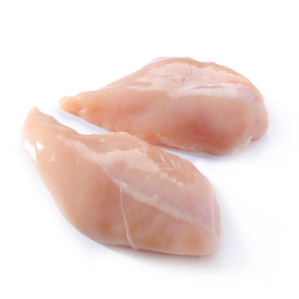

In [ ]:
test_folder = '/content/drive/MyDrive/CNNRelatedFolders/Test Images/'
test_folder
IMAGE_SHAPE = (299, 299)
image_test = Image.open(os.path.join(test_folder, 'chicken_breast.jpg')).resize(IMAGE_SHAPE)
image_test

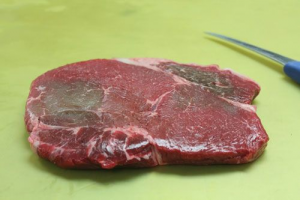

In [ ]:
test_folder = '/content/drive/MyDrive/CNNRelatedFolders/Test Images/'
test_folder

image_test = Image.open(os.path.join(test_folder, 'p_spoiled.png'))
image_test

In [ ]:
image_test = np.array(image_test)/255.0
image_test.shape

(299, 299, 3)

In [ ]:
predicted = model.predict(image_test[np.newaxis, ...])
predicted = np.argmax(predicted, axis=1)
predicted

array([2])

# **Conclusion: Transfer Learning Success**

***With a large dataset such as what was used here, consider using a machine with a high RAM. The splitting of dataset takes a lot of RAM. Consider finding ways in decreasing this RAM usage as well if a good machine is not available. Overfitting might currently be a problem. Consider this when creating the confusion matrix.***

For reference, here are the list of the labels initialized previously for the model:

```
meat_labels_dict = {
    'beef': 0,
    'pork': 1,
    'chicken': 2,
    
}
```
